In [1]:
import pandas as pd
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

🟩 Subplots with Bar Charts (2.13.1) - Problem
Matplotlib Format Charts
Problem Statement:

Create a subplot with 2 rows and 1 column:

    In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
    In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
    Use tight_layout() to adjust the spacing between subplots.

Hint:

Use plt.subplots() to create the subplots and fig.tight_layout() to adjust the spacing.

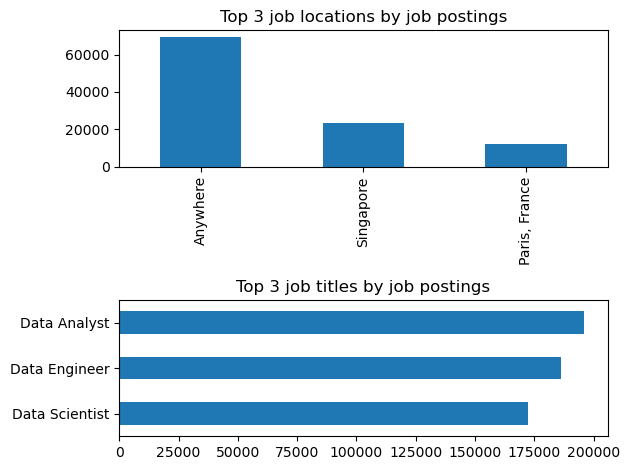

In [ ]:
fig, ax = plt.subplots(2,1)
'''
fig, xaxis = plt.subplots(2,1)

df_loc= (
    df.groupby('job_location')
        .size().reset_index(name='job_count')
        .sort_values(by='job_count',ascending=False)
        .head(3)
        .plot(kind='bar',x='job_location', y='job_count', ax=xaxis[0])
        )
df_job= (
    df.groupby('job_title_short')
        .size()
        .reset_index(name='job_count')
        .sort_values(by='job_count',ascending=False)
        .head(3)
        .plot(kind='barh',x='job_title_short', y='job_count',ax=xaxis[1])
        )

xaxis[0].set_xlabel('')
xaxis[1].set_ylabel('')
xaxis[0].set_title('Top 3 job locations by job postings')
xaxis[1].set_title('Top 3 job titles by job postings')
xaxis[0].legend().set_visible(False)
xaxis[1].legend().set_visible(False)
xaxis[1].invert_yaxis()
fig.tight_layout()
'''
# Top 3 job locations
job_locations = df['job_location'].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title('Top 3 Job Locations')

# Top 3 job titles
job_titles = df['job_title_short'].value_counts().head(3)
ax[1].barh(job_titles.index, job_titles.values)
ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()
plt.show()

🟨 Subplots with Job Titles by Schedule (2.13.2) - Problem
Matplotlib Format Charts
Problem Statement:

Create a subplot with 2 rows and 2 columns:

    In each subplot, plot a bar chart of the top 3 job titles by the number of job postings for each job schedule type (Full-time, Part-time, Contractor, and Internship).
    Use fig.tight_layout() to adjust the spacing between subplots.

Code Needed:

schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

Hint:

Use plt.subplots() to create the subplots and fig.tight_layout() to adjust the spacing. Filter the DataFrame for each job schedule type before plotting.

"\nfig, ax = plt.subplots(2, 2)\n\n# Job schedule types\nschedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']\n\nfor i, schedule in enumerate(schedules):\n    df_schedule = df[df['job_schedule_type'] == schedule]\n    job_titles = df_schedule['job_title_short'].value_counts().head(3)\n    ax[i//2, i%2].bar(job_titles.index, job_titles.values)\n    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')\n\nfig.tight_layout()\nplt.show()\n"

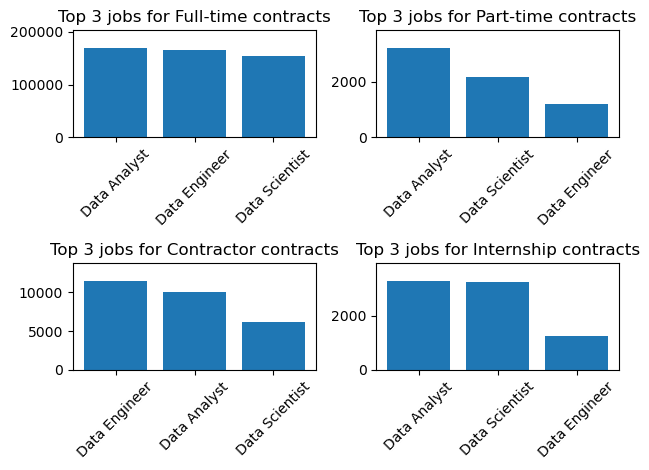

In [43]:


fig, ax = plt.subplots(2,2)
ax=ax.flatten()
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i in range(len(schedules)):
    df_job=df[df['job_schedule_type']==schedules[i]]['job_title_short'].value_counts().head(3)
    max_y= max(df_job)
    ax[i].bar(df_job.index, df_job.values)
    ax[i].set_title(f"Top 3 jobs for {schedules[i]} contracts")
    ax[i].tick_params(axis='x',rotation=45)
    ax[i].set_ylim(0,max_y*1.2)
fig.tight_layout()


'''
fig, ax = plt.subplots(2, 2)

# Job schedule types
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout()
plt.show()
'''

🟥 Top Skills for Job Roles Subplots (2.13.3) - Problem
Matplotlib Format Charts
Problem Statement:

Create a subplot with 3 rows and 1 column:

    In each subplot, plot a horizontal bar chart of the top 3 job skills by the number of job postings for each job title (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).
    Use fig.tight_layout() to adjust the spacing between subplots and invert_yaxis() to invert the y-axis in each subplot.

Code Needed:

job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

Hint:

Use the plt.subplots() function to create subplots and fig.tight_layout() to prevent overlap.

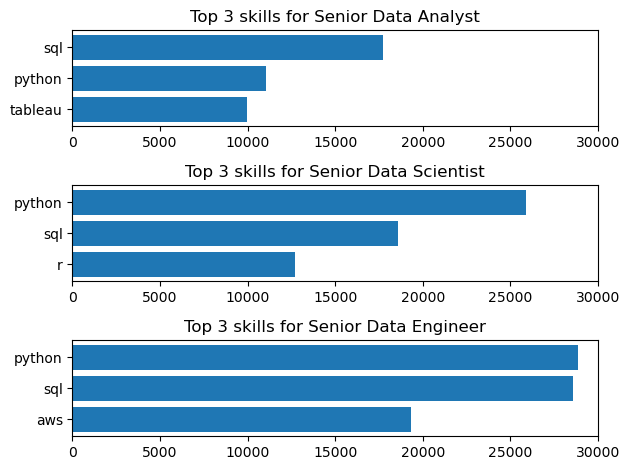

In [50]:
fig, ax = plt.subplots(3,1)

job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

df_explode=df.explode(column='job_skills')

for i, job_role in enumerate(job_roles):
    df_job = df_explode[df_explode['job_title_short']==job_role]['job_skills'].value_counts().head(3)
    ax[i].barh(df_job.index, df_job.values)
    ax[i].set_title(f"Top 3 skills for {job_role}")
    ax[i].invert_yaxis()
    ax[i].set_xlim(0,30000)

fig.tight_layout()

